<a href="https://colab.research.google.com/github/Surajkr1166/CODTECH-IT-SOLUTIONS-DATA-ANALYTICS-INTERNSHIP-TASKS-/blob/main/Sentiment_analysis_project_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import nltk

In [5]:
#upload the both dataset local drive
from google.colab import files
uploaded_train_data = files.upload()
uploaded_val_data = files.upload()

Saving twitter_training.csv to twitter_training (1).csv


Saving twitter_validation.csv to twitter_validation.csv


In [6]:
#load the data set
train_data = pd.read_csv('twitter_training.csv')
val_data = pd.read_csv('twitter_validation.csv')

In [7]:
# Download NLTK data
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [8]:
# Rename columns for consistency
train_data.columns = ['ID', 'Topic', 'Sentiment', 'Text']
val_data.columns = ['ID', 'Topic', 'Sentiment', 'Text']

In [9]:
# Merge datasets
merged_data = pd.concat([train_data, val_data], ignore_index=True)

In [12]:
# Preprocessing function
def preprocess_text(text):
    # Check if the text is a string before applying string methods
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
        text = re.sub(r'@\w+|#', '', text)  # Remove mentions and hashtags
        text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    # If not a string, return the original value (or handle it as needed)
    else:
        text = str(text) # Convert to string
    return text

In [13]:
# Apply preprocessing
merged_data['Cleaned_Text'] = merged_data['Text'].apply(preprocess_text)


In [14]:
# Sentiment analysis using VADER
sia = SentimentIntensityAnalyzer()
merged_data['Sentiment_Score'] = merged_data['Cleaned_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])



In [15]:
# Label sentiments based on scores
def label_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

merged_data['Sentiment_Label'] = merged_data['Sentiment_Score'].apply(label_sentiment)


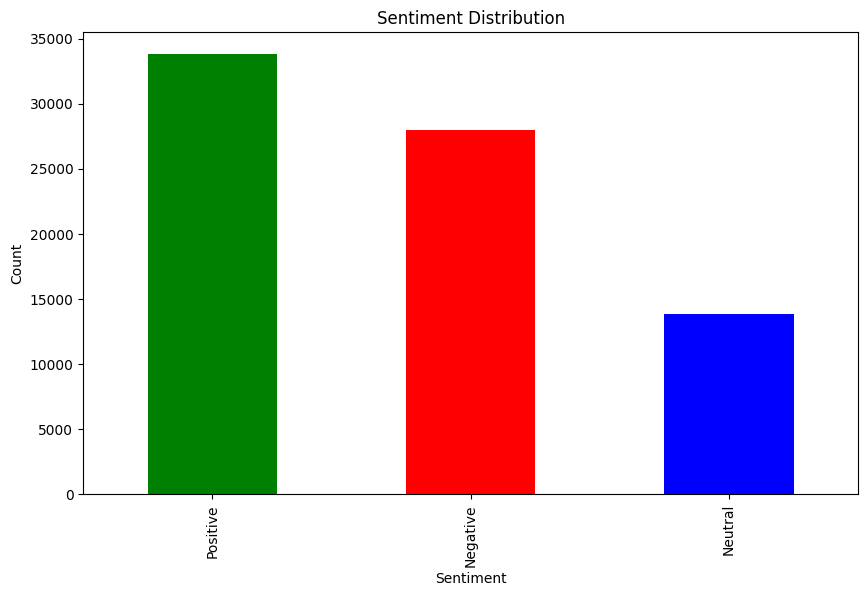

In [16]:
# Visualization of sentiment trends
plt.figure(figsize=(10, 6))
merged_data['Sentiment_Label'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

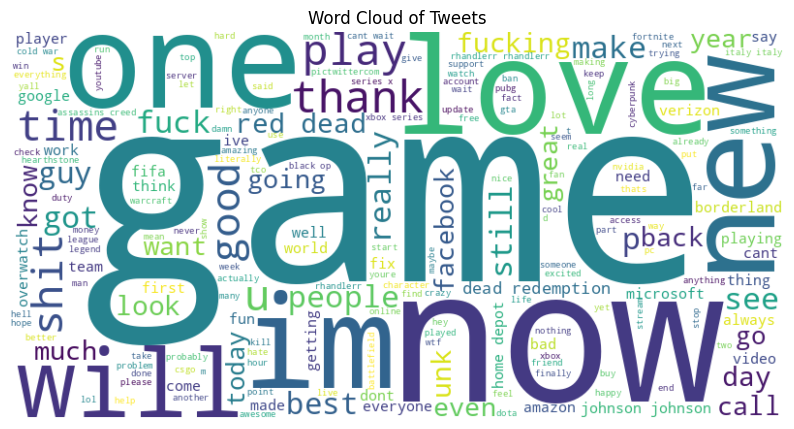

In [17]:
# Word cloud for the most common words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(merged_data['Cleaned_Text']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()


In [18]:
# Save processed data to CSV
merged_data.to_csv('processed_twitter_data.csv', index=False)

print("Analysis complete. The processed data is saved as 'processed_twitter_data.csv'.")

Analysis complete. The processed data is saved as 'processed_twitter_data.csv'.
